In [1]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
# Download the data
data = et.data.get_data('colorado-flood')

In [3]:
# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Define relative path to file with hourly precip
file_path = os.path.join("data", "colorado-flood",
                         "precipitation",
                         "805325-precip-daily-2003-2013.csv")

In [4]:
# Import data using datetime and no data value
precip_2003_2013_hourly = pd.read_csv(file_path,
                                      parse_dates=['DATE'],
                                      index_col=['DATE'],
                                      na_values=['999.99'])

# View first few rows
precip_2003_2013_hourly.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [5]:
# View dataframe info
precip_2003_2013_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1840 entries, 2003-01-01 01:00:00 to 2013-12-31 00:00:00
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STATION           1840 non-null   object 
 1   STATION_NAME      1840 non-null   object 
 2   ELEVATION         1840 non-null   float64
 3   LATITUDE          1840 non-null   float64
 4   LONGITUDE         1840 non-null   float64
 5   HPCP              1746 non-null   float64
 6   Measurement Flag  1840 non-null   object 
 7   Quality Flag      1840 non-null   object 
dtypes: float64(4), object(4)
memory usage: 129.4+ KB


In [6]:
# View summary statistics
precip_2003_2013_hourly.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


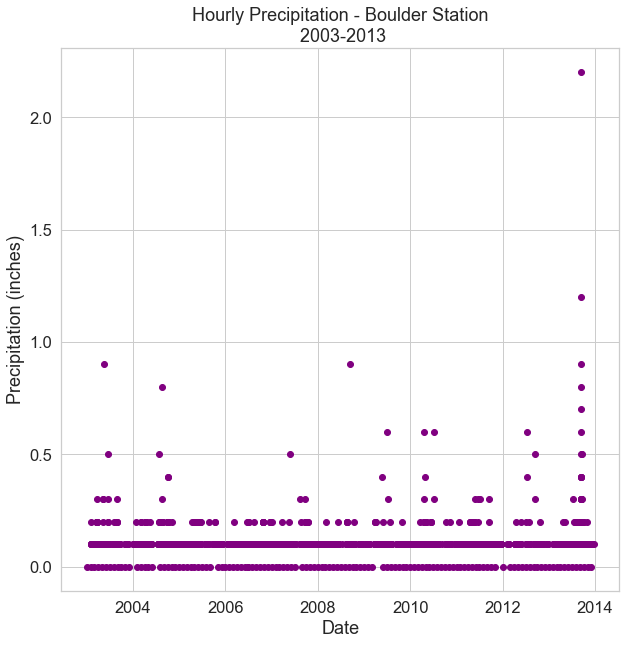

In [7]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(precip_2003_2013_hourly.index.values,
           precip_2003_2013_hourly['HPCP'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Hourly Precipitation - Boulder Station\n 2003-2013")

plt.show()

In [8]:
# Resample to daily precip sum and save as new dataframe
precip_2003_2013_daily = precip_2003_2013_hourly.resample('D').sum()

precip_2003_2013_daily

,ELEVATION,LATITUDE,LONGITUDE,HPCP
DATE,,,,
2003-01-01,1650.5,40.03389,-105.28111,0.0
2003-01-02,0.0,0.00000,0.00000,0.0
2003-01-03,0.0,0.00000,0.00000,0.0
2003-01-04,0.0,0.00000,0.00000,0.0
2003-01-05,0.0,0.00000,0.00000,0.0
...,...,...,...,...
2013-12-27,0.0,0.00000,0.00000,0.0
2013-12-28,0.0,0.00000,0.00000,0.0
2013-12-29,1650.5,40.03380,-105.28110,0.0


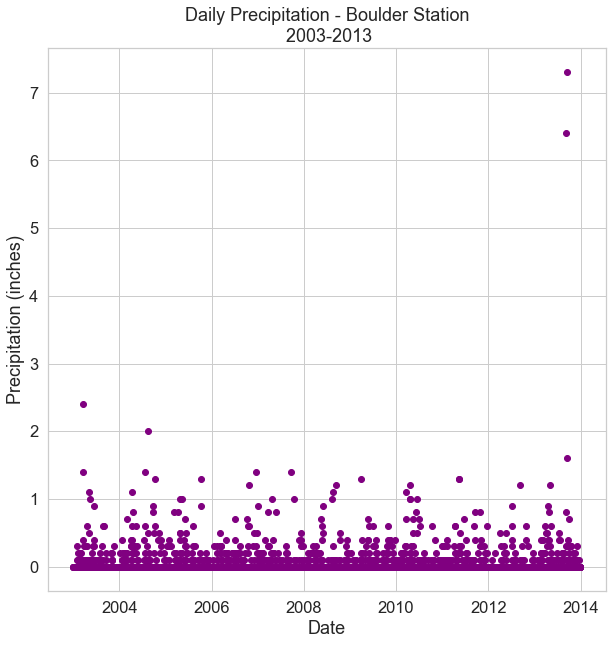

In [9]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(precip_2003_2013_daily.index.values,
           precip_2003_2013_daily['HPCP'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Precipitation - Boulder Station\n 2003-2013")

plt.show()

In [10]:
# Resample to monthly precip sum and save as new dataframe
precip_2003_2013_monthly = precip_2003_2013_daily.resample('M').sum()

precip_2003_2013_monthly

,ELEVATION,LATITUDE,LONGITUDE,HPCP
DATE,,,,
2003-01-31,1650.5,40.03389,-105.28111,0.0
2003-02-28,26408.0,640.54224,-1684.49776,1.4
2003-03-31,74272.5,1801.52505,-4737.64995,5.2
2003-04-30,28058.5,680.57613,-1789.77887,1.6
2003-05-31,34660.5,840.71169,-2210.90331,3.3
...,...,...,...,...
2013-08-31,14854.5,360.30420,-947.52990,1.0
2013-09-30,118836.0,2882.43360,-7580.23920,17.7
2013-10-31,31359.5,760.64220,-2000.34090,2.0


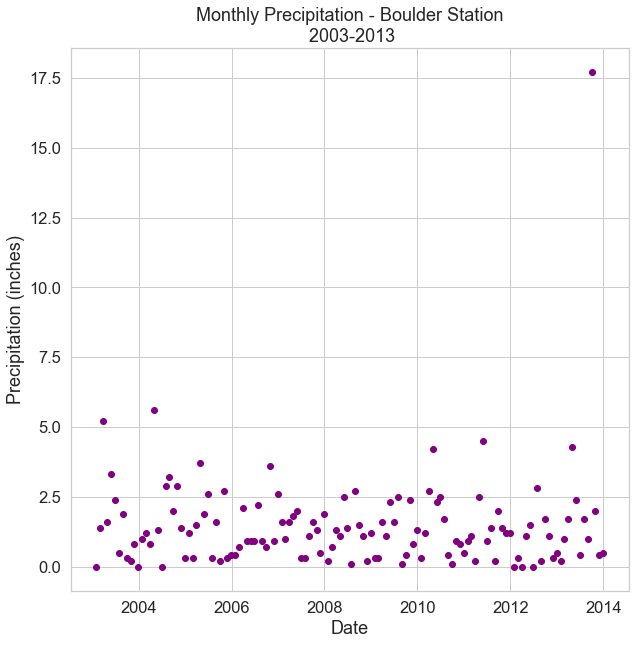

In [11]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(precip_2003_2013_monthly.index.values,
           precip_2003_2013_monthly['HPCP'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Monthly Precipitation - Boulder Station\n 2003-2013")

plt.show()

In [12]:
# Resample to monthly precip sum and save as new dataframe
precip_2003_2013_yearly = precip_2003_2013_monthly.resample('Y').sum()

precip_2003_2013_yearly

,ELEVATION,LATITUDE,LONGITUDE,HPCP
DATE,,,,
2003-12-31,255827.5,6205.25295,-16318.57205,17.6
2004-12-31,349906.0,8487.18468,-22319.59532,22.6
2005-12-31,292138.5,7085.99853,-18634.75647,16.7
2006-12-31,278934.5,6765.72741,-17792.50759,16.8
2007-12-31,259128.5,6285.32073,-16529.13427,15.0
2008-12-31,239322.5,5804.91405,-15265.76095,14.0
2009-12-31,250876.0,6085.13949,-16002.72741,14.7
2010-12-31,272332.5,6605.57700,-17371.38150,17.6
2011-12-31,300391.0,7286.15160,-19161.16020,17.5


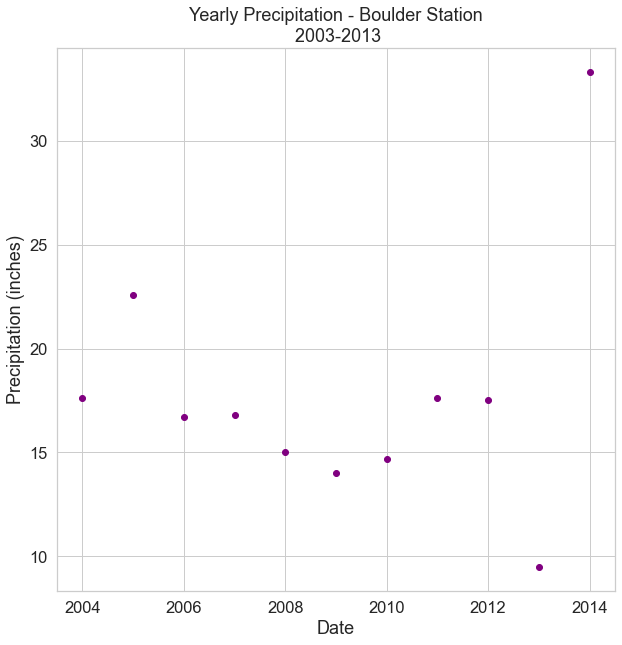

In [13]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(precip_2003_2013_hourly.resample('Y').sum().index.values,
           precip_2003_2013_hourly.resample('Y').sum()['HPCP'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Yearly Precipitation - Boulder Station\n 2003-2013")

plt.show()

In [96]:
precip_2003_2013_dailysum_weekdayavg = (precip_2003_2013_hourly
    .resample('D')
    .sum()
    .groupby([
        precip_2003_2013_daily.index.month.rename('Month'),
        precip_2003_2013_daily.index.dayofweek.rename('DayOfWeek'),
    ])
    .mean()
    # ['HPCP']
)

precip_2003_2013_dailysum_weekdayavg

ELEVATION   LATITUDE  LONGITUDE      HPCP
Month DayOfWeek                                             
1     0           471.571429  11.438249 -30.080317  0.026531
      1           168.418367   4.085085 -10.742970  0.006122
      2           275.083333   6.672309 -17.546851  0.016667
      3           336.836735   8.170178 -21.485940  0.012245
      4           309.468750   7.506352 -19.740208  0.018750
...                      ...        ...        ...       ...
12    2           976.826531  23.693501 -62.309226  0.061224
      3          1010.510204  24.510516 -64.457819  0.053061
      4           303.153061   7.353163 -19.337347  0.016327
      5           505.255102  12.255265 -32.228910  0.026531
      6           275.083333   6.672304 -17.546850  0.010417

[84 rows x 4 columns]

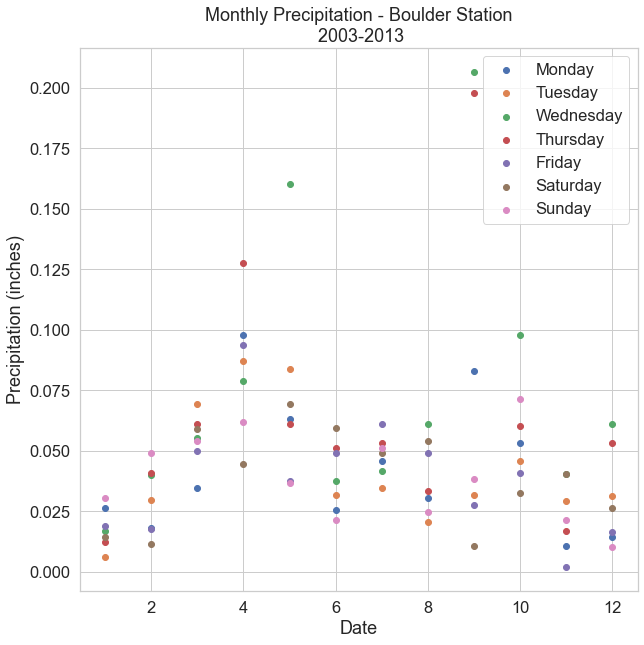

In [99]:
# Create figure and plot space
import calendar

fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
for date, new_df in precip_2003_2013_dailysum_weekdayavg.groupby(level = 1):
       ax.scatter(
              new_df.index.get_level_values('Month'),
              new_df['HPCP'],
              # color='purple',
              cmap = plt.get_cmap("tab10"),
              # c = new_df.index.get_level_values('DayOfWeek').values,
              label = calendar.day_name[new_df.index.get_level_values('DayOfWeek').values[0]],
       )

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Monthly Precipitation - Boulder Station\n 2003-2013")

ax.legend()

plt.show()

In [53]:
dfunstack = precip_2003_2013_dailysum_weekdayavg.unstack(level=1)
dfunstack.head()

ELEVATION                                                      \
DayOfWeek            0            1            2            3            4   
Month                                                                        
1           471.571429   168.418367   275.083333   336.836735   309.468750   
2           375.113636   675.204545   806.911111   712.715909   366.777778   
3           639.989796  1111.561224   808.408163   943.142857   790.864583   
4          1545.148936  1510.031915  1018.393617  1931.436170  1478.572917   
5          1077.877551  1178.928571  2441.364583   909.459184   825.250000   

                                      LATITUDE                        ...  \
DayOfWeek            5            6          0          1          2  ...   
Month                                                                 ...   
1           303.153061   639.989796  11.438249   4.085085   6.672309  ...   
2           225.068182   843.588889   9.098605  16.377488  19.572112  ...   
3          1077.877551   962.791667  15.523338  26.961577  19.608427  ...   
4           772.574468  1088.627660  37.478487  36.626703  24.701726  ...   
5          1145.244898   572.622449  26.144559  28.595612  59.216702  ...   

           LONGITUDE                            HPCP                      \
DayOfWeek          4          5          6         0         1         2   
Month                                                                      
1         -19.740208 -19.337347 -40.823287  0.026531  0.006122  0.016667   
2         -23.395802 -14.356514 -53.810342  0.018182  0.029545  0.040000   
3         -50.447195 -68.755008 -61.413980  0.034694  0.069388  0.055102   
4         -94.314326 -49.280518 -69.440729  0.097872  0.087234  0.078723   
5         -52.640552 -73.052196 -36.526097  0.063265  0.083673  0.160417   

                                                   
DayOfWeek         3         4         5         6  
Month                                              
1          0.012245  0.018750  0.014286  0.030612  
2          0.040909  0.017778  0.011364  0.048889  
3          0.061224  0.050000  0.059184  0.054167  
4          0.127660  0.093750  0.044681  0.061702  
5          0.061224  0.037500  0.069388  0.036735  

[5 rows x 28 columns]

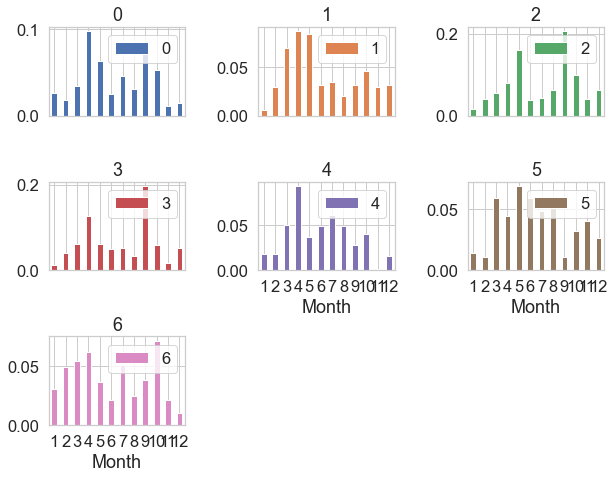

In [73]:
ax = (precip_2003_2013_dailysum_weekdayavg
    .unstack(level=1)['HPCP']
    .plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(3, 3))
)
plt.tight_layout()

In [103]:
new_df.index.get_level_values('DayOfWeek').values[0]

6